In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.patches as patches
from matplotlib.patches import ConnectionPatch
from collections import OrderedDict
from matplotlib.gridspec import GridSpec
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

In [5]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [8]:
# Importing the necessary files
df = pd.read_csv('data/flight delays data.csv')

In [9]:
df.head(15)

,delay,Day,Month,Airline,flightclass,capacity,timediff,schtime,deptime,night1,delay2,season
0,0,Thursday,April,05U,INT,0,-17,4/6/2017 5:01,4/6/2017 4:44,0,Not Delayed,Summer
1,0,Sunday,April,05U,INT,36,-25,4/9/2017 5:01,4/9/2017 4:36,0,Not Delayed,Summer
2,0,Sunday,April,05U,INT,19,-5,4/23/2017 5:01,4/23/2017 4:56,0,Not Delayed,Summer
3,0,Tuesday,April,05U,INT,33,-31,4/25/2017 5:01,4/25/2017 4:30,0,Not Delayed,Summer
4,0,Tuesday,April,05U,DOM,0,2,4/25/2017 5:01,4/25/2017 5:03,0,Not Delayed,Summer
5,0,Sunday,May,05U,INT,21,-22,5/7/2017 5:01,5/7/2017 4:39,0,Not Delayed,Summer
6,0,Tuesday,May,05U,INT,0,-19,5/9/2017 5:01,5/9/2017 4:42,0,Not Delayed,Summer
7,0,Tuesday,May,05U,DOM,0,-43,5/9/2017 5:01,5/9/2017 4:18,0,Not Delayed,Summer
8,1,Thursday,May,05U,INT,0,62,5/11/2017 5:01,5/11/2017 6:03,0,Delayed,Summer
9,0,Saturday,May,05U,INT,0,-13,5/13/2017 5:01,5/13/2017 4:48,0,Not Delayed,Summer


In [ ]:
# Checking the dimensions of the 'flight_data' dataset
df.shape

(20034, 9)

|Field|Data Type|Description|Type of Variable|Variable Category|
|-|-|-|-|-|
|year|Integer|2013|-|Ordinal|
|month|Integer|Jan = 1|-|Ordinal|
|day|Integer|1,2,3,..,31|Ordinal|
|dep_time|Integer|Military Time (1:00 PM  = 1300)|Predictor|Continuous|
|UniqueCarrier|String|Airline Carrier Code|Predictor|Categorical|
|ScheduledElapsedTime|Integer|Scheduled flight time in minutes|Predictor|Continuous|
|ArrDelay|Integer|Arrival delay in minutes||Continuous|
|DepDelay|Integer|Departure delay in minutes||Continuous|
|Distance|Integer|Distance in miles|Predictor|Continuous|

In [ ]:
# Now checking whether the dataset contains the NULL values or not.
df.isnull().sum()

delay          0
Day            0
Month          0
Airline        0
flightclass    0
capacity       0
timediff       0
night1         0
season         0
dtype: int64

There are null values in `dep_time`, `dep_delay`, `arr_time`, `arr_delay`. We have to remove them.

In [ ]:
# Dropping the rows that have NaN i.e. NULL values in them
df = df.dropna()

In [ ]:
df.head(10)

,delay,Day,Month,Airline,flightclass,capacity,timediff,night1,season
0,0,Thursday,April,05U,INT,0,-17,0,Summer
1,0,Sunday,April,05U,INT,36,-25,0,Summer
2,0,Sunday,April,05U,INT,19,-5,0,Summer
3,0,Tuesday,April,05U,INT,33,-31,0,Summer
4,0,Tuesday,April,05U,DOM,0,2,0,Summer
5,0,Sunday,May,05U,INT,21,-22,0,Summer
6,0,Tuesday,May,05U,INT,0,-19,0,Summer
7,0,Tuesday,May,05U,DOM,0,-43,0,Summer
8,1,Thursday,May,05U,INT,0,62,0,Summer
9,0,Saturday,May,05U,INT,0,-13,0,Summer


In [ ]:
df.tail(10)

,delay,Day,Month,Airline,flightclass,capacity,timediff,night1,season
20024,1,Monday,January,XU,INT,6,40,0,Winter
20025,1,Monday,January,XU,INT,22,30,0,Winter
20026,1,Monday,February,XU,INT,20,42,0,Winter
20027,1,Sunday,February,XU,INT,29,44,0,Winter
20028,1,Monday,February,XU,INT,29,54,0,Winter
20029,1,Monday,February,XU,INT,28,66,0,Winter
20030,1,Monday,March,XU,INT,29,72,0,Winter
20031,1,Monday,March,XU,INT,30,85,0,Winter
20032,1,Monday,March,XU,INT,21,69,0,Winter
20033,0,Monday,March,XU,INT,44,0,0,Winter


In [ ]:
# Dimension after dropping the rows containing NULL values
df.shape

(20034, 9)

In [ ]:
# Now again checking whether the dataset still contains any NULL values
df.isnull().sum()

delay          0
Day            0
Month          0
Airline        0
flightclass    0
capacity       0
timediff       0
night1         0
season         0
dtype: int64

In [ ]:
# Before conversion of 'dep_time', 'dep_delay', 'arr_time', 'arr_delay'
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20034 entries, 0 to 20033
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   delay        20034 non-null  int64 
 1   Day          20034 non-null  object
 2   Month        20034 non-null  object
 3   Airline      20034 non-null  object
 4   flightclass  20034 non-null  object
 5   capacity     20034 non-null  int64 
 6   timediff     20034 non-null  int64 
 7   night1       20034 non-null  int64 
 8   season       20034 non-null  object
dtypes: int64(4), object(5)
memory usage: 1.4+ MB


In [ ]:
# After conversion of 'dep_time', 'dep_delay', 'arr_time', 'arr_delay'
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20034 entries, 0 to 20033
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   delay        20034 non-null  int64 
 1   Day          20034 non-null  object
 2   Month        20034 non-null  object
 3   Airline      20034 non-null  object
 4   flightclass  20034 non-null  object
 5   capacity     20034 non-null  int64 
 6   timediff     20034 non-null  int64 
 7   night1       20034 non-null  int64 
 8   season       20034 non-null  object
dtypes: int64(4), object(5)
memory usage: 1.4+ MB


In [ ]:
df.head(10)

,delay,Day,Month,Airline,flightclass,capacity,timediff,night1,season
0,0,Thursday,April,05U,INT,0,-17,0,Summer
1,0,Sunday,April,05U,INT,36,-25,0,Summer
2,0,Sunday,April,05U,INT,19,-5,0,Summer
3,0,Tuesday,April,05U,INT,33,-31,0,Summer
4,0,Tuesday,April,05U,DOM,0,2,0,Summer
5,0,Sunday,May,05U,INT,21,-22,0,Summer
6,0,Tuesday,May,05U,INT,0,-19,0,Summer
7,0,Tuesday,May,05U,DOM,0,-43,0,Summer
8,1,Thursday,May,05U,INT,0,62,0,Summer
9,0,Saturday,May,05U,INT,0,-13,0,Summer


## Exploratory Data Analysis

Let's check the number of flights per `month`

In [ ]:
columns= ['Day','Month','Airline']
le=LabelEncoder()
for i in columns:
     df[i]=le.fit_transform(df[i])

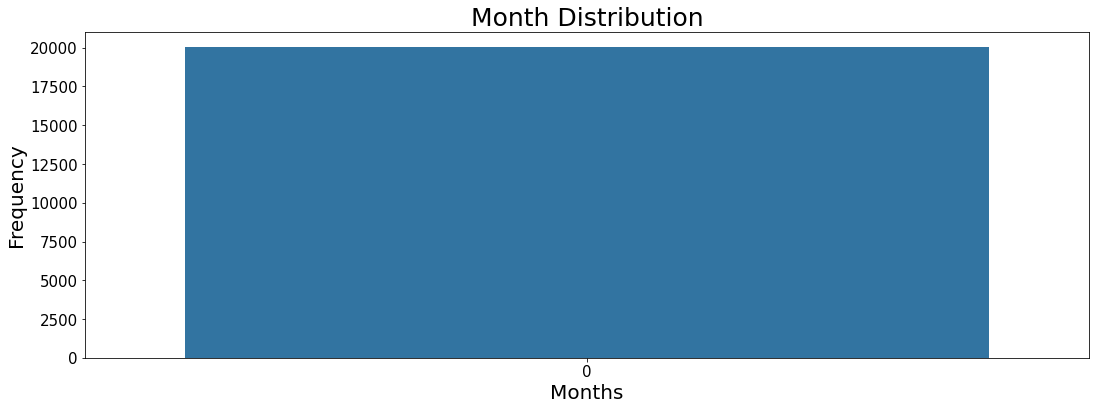

In [ ]:
plt.figure(figsize = (18, 6))
sns.countplot(df['Month'])
plt.title('Month Distribution', size = 25)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.xlabel("Months", size = 20)
plt.ylabel("Frequency", size = 20)
plt.show()

Flights are distributed fairly evenly among the months, but there is a slight decline at the beginning of the year in the month of __January__ and __February__

#### Market share of each Airline(`carrier`)

Let's see which airline(`carrier`) had most number of flights

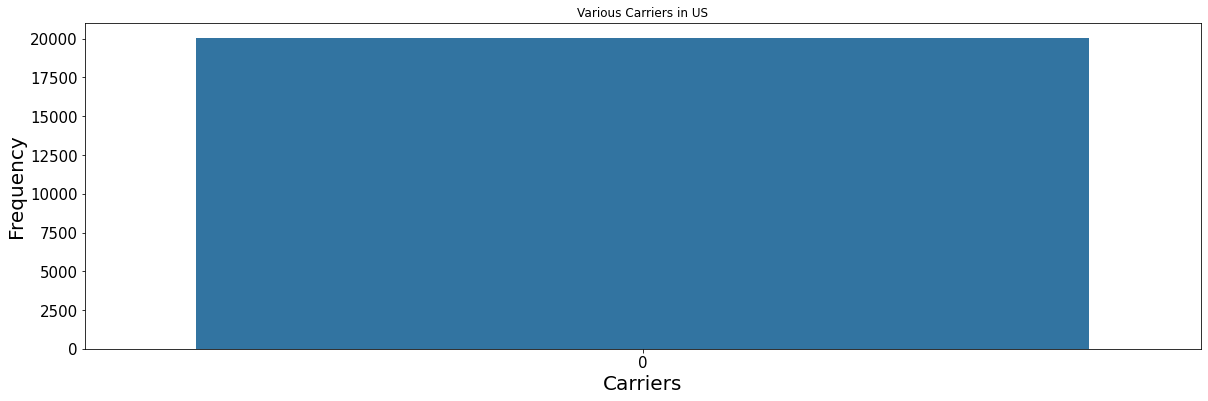

In [ ]:
plt.figure(figsize = (20, 6))
sns.countplot(df['Airline'])
plt.title('Various Carriers in US')
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.xlabel("Carriers", size = 20)
plt.ylabel("Frequency", size = 20)
plt.show()

In [ ]:
df['Airline'].value_counts().to_frame()

,Airline
19,6388
4,3666
17,1343
31,1013
7,791
24,706
14,655
12,623
25,609
13,438


In [ ]:
# function that extract statistical parameters from a grouby objet:
def get_stats(group):
    return {'min': group.min(), 'max': group.max(),
            'count': group.count(), 'mean': group.mean()}
#_______________________________________________________________
# Creation of a dataframe with statitical infos on each airline:
global_stats = df['capacity'].groupby(df['Airline']).apply(get_stats).unstack()
global_stats = global_stats.sort_values('count')
global_stats

,min,max,count,mean
Airline,,,,
0,4.0,13.0,2.0,8.500000
5,95.0,121.0,2.0,108.000000
10,61.0,89.0,2.0,75.000000
3,12.0,56.0,4.0,37.750000
23,0.0,118.0,17.0,84.823529
29,19.0,81.0,47.0,48.702128
30,0.0,148.0,68.0,65.617647
6,0.0,180.0,78.0,81.679487
9,0.0,221.0,80.0,169.900000


## Modelling

In [ ]:
def map_labels(delays):
    if delays > 50:
        return 1
    else:
        return 0

df['delayed'] = ((df['capacity'].map(map_labels) + df['timediff'].map(map_labels)) != 0).astype(int)
df['delayed'].value_counts(normalize = True)

1    0.636169
0    0.363831
Name: delayed, dtype: float64

In [ ]:
df['delayed'].value_counts().to_frame()

,delayed
1,12745
0,7289


In [ ]:
df['flightclass'].value_counts().to_frame()

,flightclass
INT,13895
DOM,6139


In [ ]:
saving_data = df.to_csv("Processed_data.csv", index = False)